In [134]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL   # an image library in python
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [135]:
## download the datasets from google website
data_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz' 


# get (download) the dataset into a folder named flower_photos, in the current directory and unzip it
# cache_dir is the directory where you want to save the dataset (specify the path)

data_dir = tf.keras.utils.get_file('flower_photos', origin=data_url, cache_dir='.', untar=True)

In [136]:
data_dir

'.\\datasets\\flower_photos'

In [137]:
#### Data Visualization

## convert the data_dir into a pathlib
## this will help us handle the data more efficiently
## beacuse we will be going over all these flower images one-by-one and convert them to numpy array

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

## Its basically your path, but a windows path object

WindowsPath('datasets/flower_photos')

In [138]:
## to list all the images (in all subfolders) which has extension jpg
list(data_dir.glob('*/*.jpg'))

# size of your dataset
len(list(data_dir.glob('*/*.jpg')))

3670

In [139]:
## to get all roses images 
roses = list((data_dir.glob('roses/*.jpg')))

roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

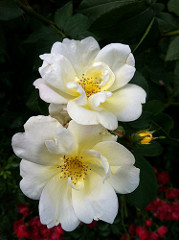

In [140]:
## to visualize the images using PIL module (pillow library)

PIL.Image.open(str(roses[0]))

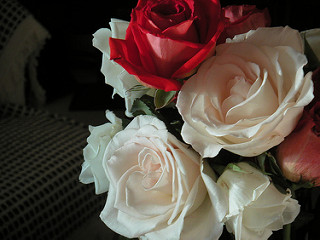

In [141]:
PIL.Image.open(str(roses[1]))

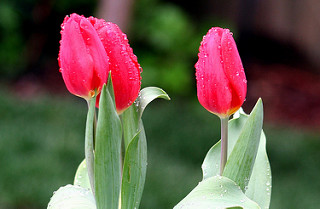

In [142]:
tulips = list((data_dir.glob('tulips/*.jpg')))
PIL.Image.open(tulips[0])

In [143]:
## create classnames
## create a dictionary of different flowers and all the image path associated with it

flowers_image_dict = {
    'roses':list((data_dir.glob('roses/*.jpg'))),
    'daisy':list((data_dir.glob('daisy/*.jpg'))),
    'dandelion':list((data_dir.glob('dandelion/*.jpg'))),
    'sunflowers':list((data_dir.glob('sunflowers/*.jpg'))),
    'tulips':list((data_dir.glob('tulips/*.jpg'))),  
}

In [144]:
# assign a label dictionary 
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,   
}

In [167]:
## we can use opencv module to read these image files into opencv object
## (sort of like a numpy array)

img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

## opencv read the image from disk and converted them into 3D numpy array

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [146]:
img.shape

## this image here is 240px by 179px 
## the 3 refers to RGB channel

(240, 179, 3)

In [147]:
## before we train our model, we need the images to all have same size (ML model requires this)
## opencv has a function for resizing the shape of an image 

cv2.resize(img,(100,100)).shape

## see that the new shape is now 100px by 100px

(100, 100, 3)

In [148]:
### Now lets run a for loop to prepare our x and y

X, y = [], []

for flower_name, images in flowers_image_dict.items():
    #print(flower_name)   ##looping over a dictionary, this refers to each head(tag) and images refers to the items in it
    for image in images:   ##to loop over every image in each image class
        img = cv2.imread(str(image)) ##str to convert from lib path to regular string
        resized_img = cv2.resize(img,(180,100))  ##we resize the images
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name]) 

In [149]:
X[0]

array([[[ 5, 20, 12],
        [ 5, 20, 12],
        [ 4, 20, 11],
        ...,
        [21, 47, 30],
        [23, 50, 33],
        [25, 51, 34]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 44, 30],
        [22, 45, 31],
        [24, 48, 33]],

       [[13, 22, 15],
        [12, 21, 14],
        [10, 21, 13],
        ...,
        [22, 46, 26],
        [21, 45, 25],
        [21, 45, 25]],

       ...,

       [[ 3, 16,  8],
        [ 7, 18, 10],
        [ 8, 16,  9],
        ...,
        [ 6, 10,  6],
        [ 2,  5,  3],
        [ 0,  2,  2]],

       [[11, 23, 17],
        [11, 22, 14],
        [12, 21, 11],
        ...,
        [ 8, 15,  8],
        [ 2,  8,  3],
        [ 0,  2,  0]],

       [[16, 27, 25],
        [18, 26, 24],
        [17, 25, 18],
        ...,
        [ 2, 12,  2],
        [ 1,  9,  2],
        [ 1,  8,  2]]], dtype=uint8)

In [150]:
## converting to numpy array

X = np.array(X)
y = np.array(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [151]:
X_train_scaled.shape

(2752, 100, 180, 3)

In [152]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(100,180,3)),
    layers.MaxPool2D((2,2)),
    # 16 filters, with size 3x3
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    # 32 filters, with size 3x3
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    # 64 filters, with size 3x3
    
    #dense neural network layer
    layers.Flatten(),
    #one hidden layer with 128 neurons
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')   #output layer, we have 5 classes 
])

model.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy', #using 'sparse_categorical_crossentropy' because the final array (y) has its exact value (not one-hot encoded vector)
           metrics=['accuracy'])                        

    

In [153]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 16s 171ms/step - loss: 1.3186 - accuracy: 0.4157
Epoch 2/10
86/86 [==============================] - 17s 197ms/step - loss: 1.0046 - accuracy: 0.6174
Epoch 3/10
86/86 [==============================] - 18s 207ms/step - loss: 0.8651 - accuracy: 0.6646
Epoch 4/10
86/86 [==============================] - 18s 206ms/step - loss: 0.7257 - accuracy: 0.7275
Epoch 5/10
86/86 [==============================] - 16s 191ms/step - loss: 0.5712 - accuracy: 0.7889
Epoch 6/10
86/86 [==============================] - 16s 188ms/step - loss: 0.4486 - accuracy: 0.8328
Epoch 7/10
86/86 [==============================] - 16s 188ms/step - loss: 0.3229 - accuracy: 0.8859
Epoch 8/10
86/86 [==============================] - 17s 193ms/step - loss: 0.2361 - accuracy: 0.9204
Epoch 9/10
86/86 [==============================] - 17s 199ms/step - loss: 0.1607 - accuracy: 0.9473
Epoch 10/10
86/86 [==============================] - 16s 184ms/step - loss: 0.0921 - accura

In [154]:
model.evaluate(X_test_scaled,y_test)
## accuracy is low on test data.
## this is due to overfitting 


29/29 [==============================] - 2s 53ms/step - loss: 1.4740 - accuracy: 0.6558


[1.4739865064620972, 0.655773401260376]

In [155]:
model.predict(X_test_scaled)[0]
np.argmax(model.predict(X_test_scaled)[0])

29/29 [==============================] - 2s 56ms/step


1

In [156]:
y_test[0]

1

In [157]:
## clearly it misclassified some data

model.predict(X_test_scaled)[50]
np.argmax(model.predict(X_test_scaled)[50])

29/29 [==============================] - 1s 40ms/step


4

In [158]:
y_test[50]

0

In [159]:
#### Data Augumentation

data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9)    ## you can also use 'RandomContrast'
])

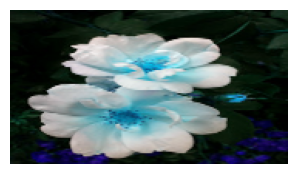

In [160]:
plt.figure(figsize=(15,2))
plt.axis('off')
plt.imshow(X[0])

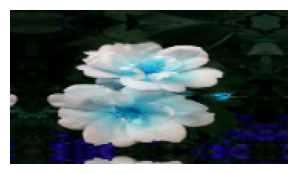

In [161]:
plt.figure(figsize=(15,2))
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))     ##data_augmentation requires a vector as input (we also had to convert to numpy)

In [162]:
#### Data Augmentation applied to model

data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(100,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [163]:
#### Adding data augumentation and drop out layer to the pipeline

model = Sequential([
    #data augumentation
    data_augmentation,    ##supply data augmentation as your first layer 
    
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    # 16 filters, with size 3x3
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    # 32 filters, with size 3x3
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D((2,2)),
    # 64 filters, with size 3x3
    
    layers.Dropout(0.2),
    #dropout layer, to drop 20% of the neurons at random in each pass
    #to give better generalization
    
    #dense neural network layer
    layers.Flatten(),
    #one hidden layer with 128 neurons
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')   #output layer, we have 5 classes 
])

model.compile(optimizer='adam',
           loss = 'sparse_categorical_crossentropy', #using 'sparse_categorical_crossentropy' because the final array (y) has its exact value (not one-hot encoded vector)
           metrics=['accuracy'])                        

In [164]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 23s 246ms/step - loss: 1.3181 - accuracy: 0.4408
Epoch 2/10
86/86 [==============================] - 20s 236ms/step - loss: 1.0410 - accuracy: 0.5912
Epoch 3/10
86/86 [==============================] - 21s 244ms/step - loss: 0.9472 - accuracy: 0.6301
Epoch 4/10
86/86 [==============================] - 19s 224ms/step - loss: 0.8586 - accuracy: 0.6708
Epoch 5/10
86/86 [==============================] - 19s 219ms/step - loss: 0.8274 - accuracy: 0.6737
Epoch 6/10
86/86 [==============================] - 19s 223ms/step - loss: 0.7966 - accuracy: 0.6915
Epoch 7/10
86/86 [==============================] - 20s 233ms/step - loss: 0.7584 - accuracy: 0.7089
Epoch 8/10
86/86 [==============================] - 21s 242ms/step - loss: 0.7194 - accuracy: 0.7238
Epoch 9/10
86/86 [==============================] - 21s 241ms/step - loss: 0.6971 - accuracy: 0.7384
Epoch 10/10
86/86 [==============================] - 21s 240ms/step - loss: 0.6797 - accura

In [165]:
model.evaluate(X_test_scaled, y_test)

## accuracy is higher

29/29 [==============================] - 2s 73ms/step - loss: 0.8395 - accuracy: 0.6841


[0.8394644856452942, 0.6840958595275879]